# The Moscow catering market research

**Project content**

1. [Data Acquaintance](#start)
2. [Data preprocessing](#preprocessing)
3. [Exploratory data analysis](#eda)
4. [Detailed study. (Coffee houses)](#cofee)
6. [General conclusions](#conclusion)
7. [Recomendations](#recomend) 
7. [Presentation](#present)

**Project description**<br/>
Investment fund "Shut Up and Take My Money" decided to open a catering establishment in Moscow. Previously, the fund did not work in this market; for this, it ordered an analytical study of the market. Additionally, the Customer singled out the type of establishment "coffee house" as the most interesting for him and wants to understand whether it is profitable to invest in coffee houses.<br/>
Project objectives:<br/>

1.Consider the catering market in the city<br/> 
2.Find Market Patterns<br/> 
3.Highlight the most successful areas in this market<br/> 
4.Determine the most convenient areas of the city for the start-up project<br/> 
5.Determine the type of institution in which the customer should invest<br/> 
6.To understand whether the opening of a coffee shop, which was prioritized by the Customer, is relevant<br/> 
7.Make a PowerPoint presentation of the study







## Data Acquaintance
<a id="start"></a>

*Let's call the libraries we need*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
import math as mt
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
from matplotlib.pyplot import figure
import plotly.express as px
from plotly import graph_objects as go
import folium
import json

In [2]:
try:
     data = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')
except:
     data = pd.read_csv('https://drive.google.com/file/d/14D1otpchWL4RfxctsSbveFXd6g28qIIF/view?usp=sharing')

In [3]:
data.head(20)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0
5,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",55.888010,37.509573,4.6,средние,NaN,NaN,NaN,0,NaN
6,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,55.890752,37.524653,4.4,средние,Средний счёт:199 ₽,199.0,NaN,0,45.0
7,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.890636,37.524303,4.7,средние,Средний счёт:200–300 ₽,250.0,NaN,0,45.0
8,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",55.880045,37.539006,4.8,средние,Средний счёт:от 500 ₽,500.0,NaN,0,79.0
9,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",55.879038,37.524487,4.3,средние,Средний счёт:1000–1200 ₽,1100.0,NaN,0,65.0


**Data frame content**<br/>
name — establishment name;<br/>
address — address of the establishment;<br/>
category - the category of the establishment, for example, "cafe", "pizzeria" or "coffee shop";<br/>
hours — information about days and hours of work;<br/>
lat — latitude of the geographic point where the establishment is located;<br/>
lng — longitude of the geographic point where the establishment is located;<br/>
rating —establishment rating according to user ratings in Yandex Maps (highest rating — 5.0);<br/>
price — category of prices in the establishment, for example, "average", "below average", "above average" and so on;<br/>
avg_bill is a string that stores the average cost of an order as a range, for example:<br/>
"Average bill: 1000–1500 ₽";<br/>
"Price of a cup of cappuccino: 130–220 ₽";<br/>
“The price of a glass of beer: 400–600 ₽.”<br/>
and so on;<br/>
middle_avg_bill is a number with an estimate of the average bill, which is indicated only for values ​​from the avg_bill column that begins with the substring "Average bill":<br/>
If a row contains a price range of two values, the column will contain the median of these two values.<br/>
If the line contains one number — the price without a range, then this number will be included in the column.<br/>
If there is no value, or it does not start with the substring "Average score", then nothing will be included in the column.<br/>
middle_coffee_cup is a number with an estimate of one cup of cappuccino, which is indicated only for values ​​from the avg_bill column that begins with the substring "Price of one cup of cappuccino":<br/>
If a row contains a price range of two values, the column will contain the median of these two values.<br/>
If the line contains one number — the price without a range, then this number will be included in the column.<br/>
If there is no value, or it does not start with the substring "Price of one cup of cappuccino", then nothing will be included in the column.<br/>
chain - a number, expressed as 0 or 1, which indicates whether the institution is a network one (for small chains, errors may occur);<br/>
district - the administrative district in which the establishment is located, such as the Central Administrative District;<br/>
seats — number of seats.


*Let's call the "describe" and "info" methods to continue our acquaintance with the data*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [5]:
data.describe()

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


*Let's display the general histograms of the data to get acquainted with them.*

In [6]:
sns.set_style('dark') 

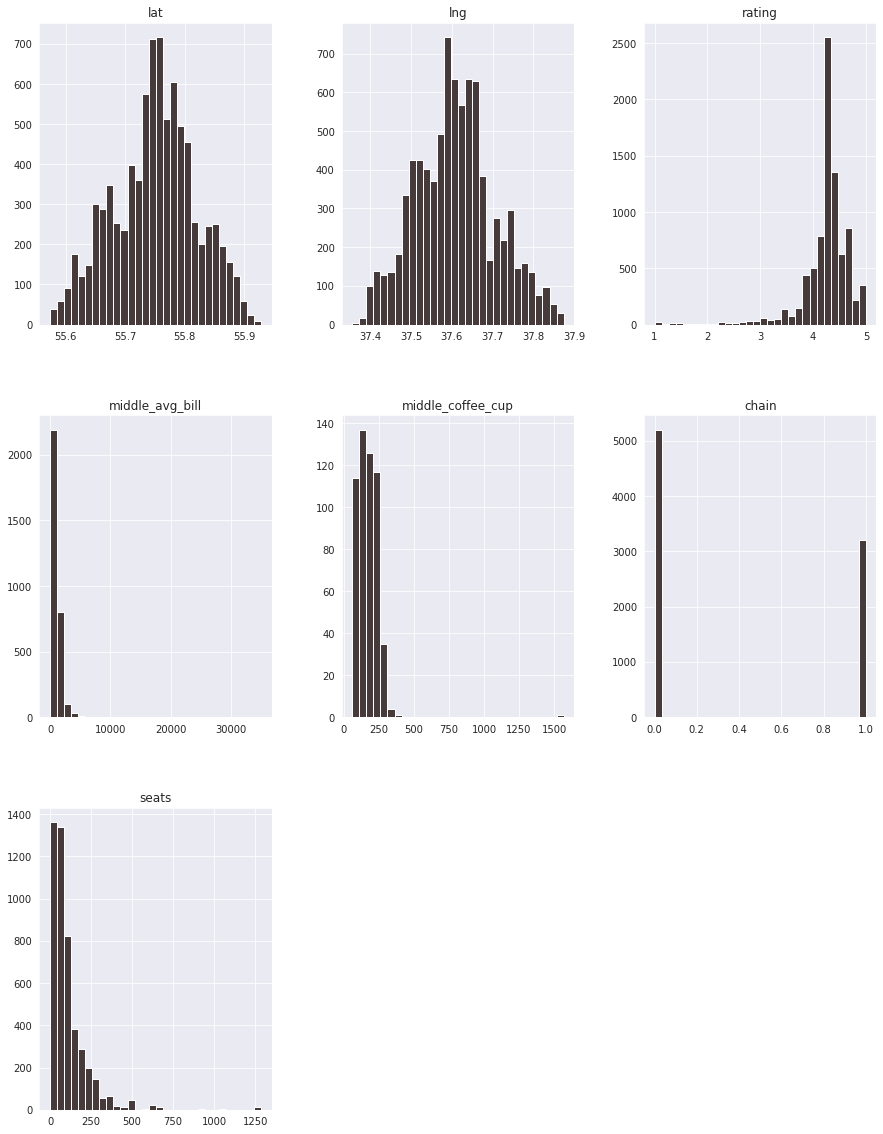

In [7]:
data.hist(bins=30,figsize=(15, 20), color = '#473a3a');

*Display the number of gaps in the data on the graph*

In [8]:
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16, color = '#285862')
        .set_title('Content gaps in the data' + "\n", fontsize = 22, color = '#285862')    
    );    

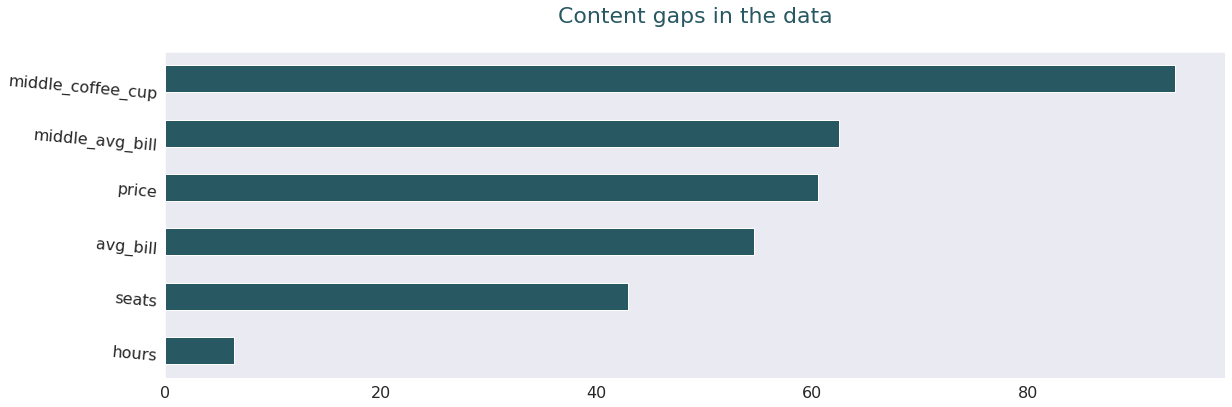

In [9]:
pass_value_barh(data)

<div style="border:solid green 2px; padding: 20px">

    
**Conclusions:**
The data contains 8406 lines. There are many gaps in the data, especially in the cost of an average cup of coffee (almost 90% of gaps). The number of seats, the cost of an average cup of coffee, and the average bill clearly contain abnormal values, as can be seen from the histograms, as well as from the Describe table (maximum values: 1288, 1568, and 3500, respectively). It is also necessary to check the data for duplicates, process gaps, change data types, get rid of anomalies, and add some calculated values. Getting Started with Data Preprocessing

## Data preprocessing
<a id="preprocessing"></a>

### Duplicate processing

*We start by checking for explicit and implicit duplicates, first, we find their number*

In [10]:
data.duplicated().mean()

0.0

*There are no explicit duplicates, let's try to deal with implicit ones, display the number of unique values ​​of establishments and their names*

In [11]:
data['name'].nunique()

5614

In [12]:
pd.options.display.max_rows = 1000

In [13]:
pd.unique(data['name'])

array(['WoWфли', 'Четыре комнаты', 'Хазри', ..., 'Миславнес', 'Самовар',
       'Kebab Time'], dtype=object)

In [14]:
data['name'].value_counts().head(1000)

Кафе                                      189
Шоколадница                               120
Домино'с Пицца                             76
Додо Пицца                                 74
One Price Coffee                           71
Яндекс Лавка                               69
Cofix                                      65
Prime                                      50
Хинкальная                                 44
Шаурма                                     43
КОФЕПОРТ                                   42
Кулинарная лавка братьев Караваевых        39
Теремок                                    38
Чайхана                                    37
Ресторан                                   34
CofeFest                                   32
Буханка                                    32
Столовая                                   28
Му-Му                                      27
Drive Café                                 24
Кофемания                                  23
АндерСон                          

*Now let's try to lowercase the column and check for duplicates again*

In [15]:
data['name'] = data['name'].str.lower() 

In [16]:
data.duplicated().mean()

0.0

In [17]:
data['name'].nunique()

5512

*There are still no completely duplicate rows, but the number of unique values ​​has decreased, which means that if they hadn’t checked, chain restaurants could have been skipped*

*No implicit duplicates were found in the first 1000 names, but there are such anomalous networks as the Cafe cafe, they will also need to be dealt with when processing anomalies*

### Gap processing

*Once again, display the number of gaps in the columns*

In [18]:
data.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
name                    0
category                0
address                 0
district                0
lat                     0
lng                     0
rating                  0
chain                   0
dtype: int64

In [19]:
data.isna().mean().sort_values(ascending=False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
lat                  0.000000
lng                  0.000000
rating               0.000000
chain                0.000000
dtype: float64

In [20]:
data[data['hours'].isna() == True]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
38,ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,55.888366,37.514856,4.4,NaN,NaN,NaN,NaN,0,NaN
40,кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,55.895115,37.524902,3.7,NaN,NaN,NaN,NaN,0,NaN
44,кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,55.876289,37.519315,3.8,NaN,NaN,NaN,NaN,1,8.0
56,рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,55.888010,37.515960,1.5,NaN,NaN,NaN,NaN,0,NaN
108,кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,55.908930,37.558777,4.2,NaN,NaN,NaN,NaN,0,NaN
123,кафе,кафе,"Москва, Шенкурский проезд, 14",Северо-Восточный административный округ,NaN,55.897794,37.591395,4.3,NaN,NaN,NaN,NaN,0,50.0
126,кулинария,кафе,"Москва, Череповецкая улица, 17",Северо-Восточный административный округ,NaN,55.898741,37.585301,3.9,NaN,NaN,NaN,NaN,1,NaN
138,хинкальная,быстрое питание,"Москва, Шенкурский проезд, 14",Северо-Восточный административный округ,NaN,55.897751,37.591363,4.1,NaN,NaN,NaN,NaN,1,50.0
217,16 июня,кафе,"Москва, бульвар Академика Ландау, 3",Северо-Восточный административный округ,NaN,55.920370,37.552150,1.4,NaN,NaN,NaN,NaN,0,NaN
274,чайхана,кафе,"Москва, Широкая улица, 12",Северо-Восточный административный округ,NaN,55.886840,37.659610,3.0,NaN,NaN,NaN,NaN,1,50.0


*Since there are 6.3% gaps in the column of only hours, we can delete all this data, especially since this indicator will be useful to us in development, and also, as others are visible, there are gaps in the columns.*

In [21]:
data = data.dropna(subset =['hours']).copy()

In [22]:
data.isna().mean().sort_values(ascending=False)

middle_coffee_cup    0.932147
middle_avg_bill      0.600635
price                0.579416
avg_bill             0.516137
seats                0.428844
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.000000
lat                  0.000000
lng                  0.000000
rating               0.000000
chain                0.000000
dtype: float64

*The number of gaps in other columns also decreased, which means that the solution was correct*

*We will also fill in the gaps of all columns with numerical data with a stub -55*

In [23]:
data['seats'] = data['seats'].fillna(-55)

In [24]:
data['middle_avg_bill'] = data['middle_avg_bill'].fillna(-55)

In [25]:
data['middle_coffee_cup'] = data['middle_coffee_cup'].fillna(-55)

In [26]:
data.isna().mean().sort_values(ascending=False)

price                0.579416
avg_bill             0.516137
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.000000
lat                  0.000000
lng                  0.000000
rating               0.000000
middle_avg_bill      0.000000
middle_coffee_cup    0.000000
chain                0.000000
seats                0.000000
dtype: float64

*The rest of the gaps will be left unchanged since they will not affect the filtering.*

### Changing Data Types

*The number of footprints must be an integer, so let's fix the type data in this column*

In [27]:
data['seats'] = data['seats'].astype('int32')

*Let's convert the column with the chain marker to a boolean type*

In [28]:
data['chain'] = data['chain'].astype('bool')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7870 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7870 non-null   object 
 1   category           7870 non-null   object 
 2   address            7870 non-null   object 
 3   district           7870 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                7870 non-null   float64
 6   lng                7870 non-null   float64
 7   rating             7870 non-null   float64
 8   price              3310 non-null   object 
 9   avg_bill           3808 non-null   object 
 10  middle_avg_bill    7870 non-null   float64
 11  middle_coffee_cup  7870 non-null   float64
 12  chain              7870 non-null   bool   
 13  seats              7870 non-null   int32  
dtypes: bool(1), float64(5), int32(1), object(7)
memory usage: 837.7+ KB


### Removing anomalies

*Let's consider the percentiles of the anomalous columns Number of seats, cost of an average cup of coffee, and average check*

In [30]:
print(' 90 percentile of seats number: {}'.format(round(np.percentile(data[data['seats']!=-55]['seats'], 90)),2))
print (' 95 percentile of seats number: {}'.format(round(np.percentile(data[data['seats']!=-55]['seats'], 95)),2))
print(' 99 percentile of seats number: {}'.format(round(np.percentile(data[data['seats']!=-55]['seats'], 99)),2))

 90 percentile of seats number: 240
 95 percentile of seats number: 306
 99 percentile of seats number: 625


In [31]:
print(' 90 percentile of average bill: {}'.format(round(np.percentile(data[data['middle_avg_bill']!=-55]['middle_avg_bill'], 90)),2))
print (' 95 percentile of average bill: {}'.format(round(np.percentile(data[data['middle_avg_bill']!=-55]['middle_avg_bill'], 95)),2))
print(' 99 percentile of average bill: {}'.format(round(np.percentile(data[data['middle_avg_bill']!=-55]['middle_avg_bill'], 99)),2))

 90 percentile of average bill: 2000
 95 percentile of average bill: 2250
 99 percentile of average bill: 3750


In [32]:
print(' 90 percentile of average capucino price: {}'.format(round(np.percentile(data[data['middle_coffee_cup']!=-55]['middle_coffee_cup'], 90)),2))
print (' 95 percentile of average capucino price: {}'.format(round(np.percentile(data[data['middle_coffee_cup']!=-55]['middle_coffee_cup'], 95)),2))
print(' 99 percentile of average capucino price: {}'.format(round(np.percentile(data[data['middle_coffee_cup']!=-55]['middle_coffee_cup'], 99)),2))

 90 percentile of average capucino price: 256
 95 percentile of average capucino price: 275
 99 percentile of average capucino price: 310


*We will remove all anomalous values for these columns, everything that is greater than the 99 percentile, so as not to lose much in the data*

In [33]:
data = data.query('seats < 625').copy()

In [34]:
data = data.query('middle_avg_bill < 3750').copy()

In [35]:
data = data.query('middle_coffee_cup < 310').copy()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7782 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7782 non-null   object 
 1   category           7782 non-null   object 
 2   address            7782 non-null   object 
 3   district           7782 non-null   object 
 4   hours              7782 non-null   object 
 5   lat                7782 non-null   float64
 6   lng                7782 non-null   float64
 7   rating             7782 non-null   float64
 8   price              3251 non-null   object 
 9   avg_bill           3744 non-null   object 
 10  middle_avg_bill    7782 non-null   float64
 11  middle_coffee_cup  7782 non-null   float64
 12  chain              7782 non-null   bool   
 13  seats              7782 non-null   int32  
dtypes: bool(1), float64(5), int32(1), object(7)
memory usage: 828.4+ KB


*In total, we got rid of 7.41% of the data, getting cleaner data*

### Adding calculation columns


*Let's create a street column with street names*

In [37]:
data['street'] = data['address'].str.split(', ').apply(lambda x: x[1])

*Let's add a column with establishments that work around the clock, the value type is boolean* 

In [38]:
data['is_24/7'] = data['hours'].str.contains('ежедневно, круглосуточно')

In [39]:
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,-55.0,-55.0,False,-55,улица Дыбенко,False
1,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-55.0,False,4,улица Дыбенко,False
2,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,-55.0,False,45,Клязьминская улица,False
3,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,-55.0,170.0,False,-55,улица Маршала Федоренко,False
4,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,-55.0,True,148,Правобережная улица,False


<div style="border:solid green 2px; padding: 20px">
    
**Conclusion:**
   <br/> When pre-preparing the data, the following was done:
     <br/>Duplicates checked.
     <br/>Data types have been changed.
     <br/>Filled data gaps based on parameters.
     <br/>The data is free from outliers and anomalies to a degree that does not affect the sample.
     <br/>Required columns added.
     <br/>In total, we got rid of 7.14% of the data.
     <br/>DataFrame prepared for further research and analysis.

## Exploratory data analysis
<a id="eda"></a>

### Types of establishments

*Let's consider the types of establishments and their number*

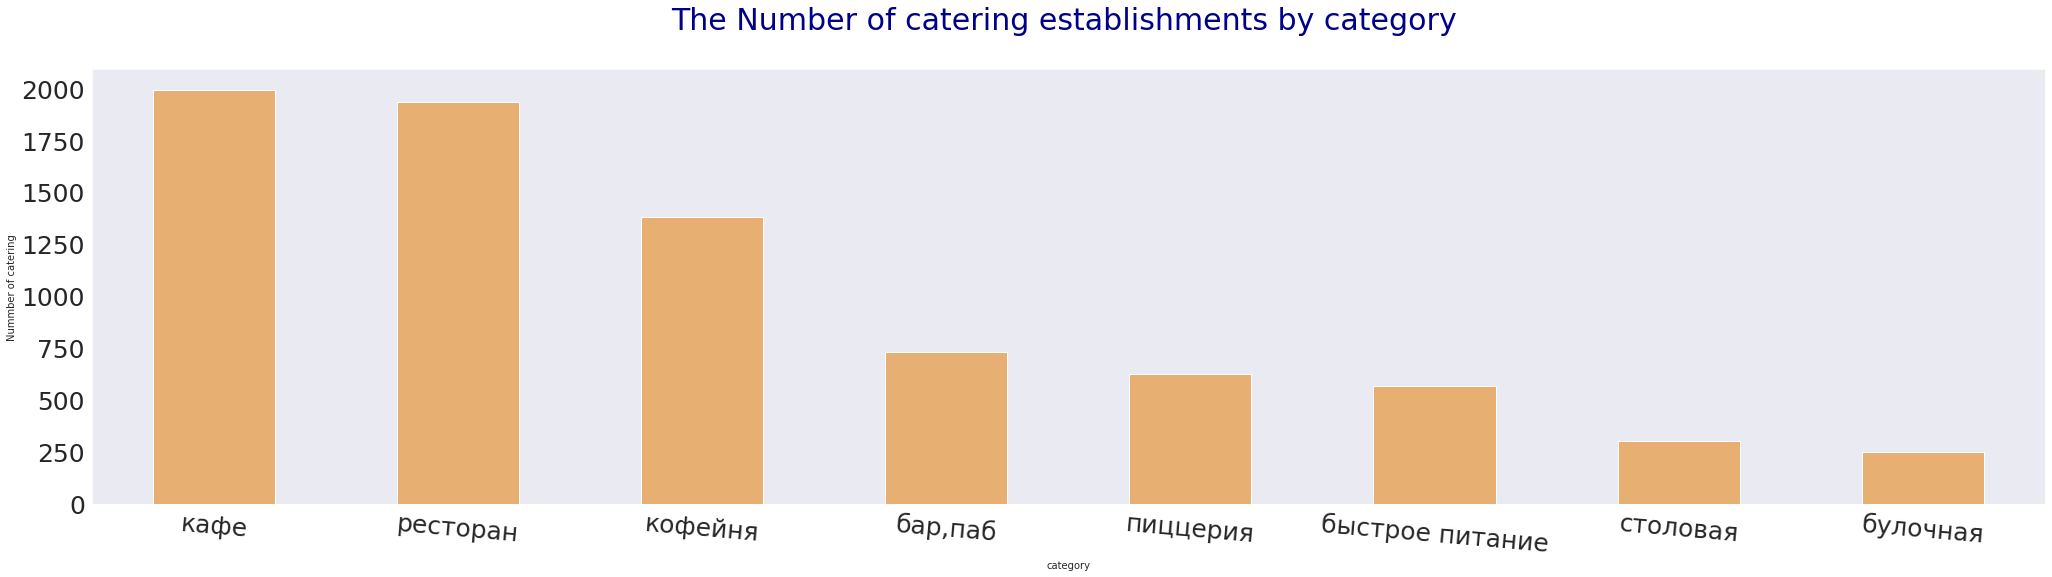

In [40]:
(data
    .groupby('category')['name'].count()
    .sort_values(ascending=False)
    .plot(kind = 'bar', x='category', y='count', figsize=(35,8), rot = -5, legend = False, fontsize = 25, color = '#e8af73', ylabel='Nummber of catering')
    .set_title('The Number of catering establishments by category ' + "\n", fontsize = 30, color = 'DarkBlue')
    
); 

*The following categories are presented in the dataset:
- "cafés" - establishments with small production, less costly than "restaurants";
- "restaurants" - establishments with high production costs, several shops, such as a hot shop, a cold shop, a confectionery shop, and a large amount of staff (cooks, confectioners, bartenders, waiters, working kitchens, etc.);
- "coffee houses" - differ from cafés, in most cases, the absence of a kitchen: the production is often placed separately or taken on a subcontract, and the equipment includes a coffee machine and a microwave oven; the staff is also minimal, most often a barista and a waiter;
- "bars and pubs" - establishments focused on alcohol with a minimum cost of food production, the staff is also represented at a minimum;
- "pizzeria" - is distinguished by specific equipment, as well as a universal staff of cooks who do everything according to technological maps, more often works for delivery;
- "fast food" - an establishment with a large amount of staff, conveyor type, always works on the verge of cost and survives due to traffic;
- "dining room" - establishments with a large kitchen and equipment, also distinguished by low-cost production and work through traffic;
- "bakery" - establishments focused on confectionery production, most often working for take-out or delivery.

Most of all, the data include cafés and restaurants, followed by coffee houses. Least of all bakeries and canteens.*

In [41]:
(
    data
    
    .pivot_table(index='category', values='name', aggfunc='count')
    .reset_index()
    .rename(columns={'name':'number'})
    .sort_values(by='number', ascending=False)
    .style.background_gradient('coolwarm')
)    

,category,number
3,кафе,1993
6,ресторан,1933
4,кофейня,1380
0,"бар,паб",732
5,пиццерия,624
2,быстрое питание,568
7,столовая,304
1,булочная,248


*Let's consider the average check for institutions.*

In [42]:
category_bill = (
    data[data['middle_avg_bill']!=-55]
    
    .pivot_table(index='category', values='middle_avg_bill', aggfunc=['count','mean','median'])
    .reset_index()
    .rename(columns={'middle_avg_bill':'number','mean': 'average_bill','median':'median_bill'})
    
)
category_bill.columns = ['category','number','average_bill','median_bill']
category_bill.sort_values(by='average_bill', ascending=False) .style.background_gradient('coolwarm')

,category,number,average_bill,median_bill
0,"бар,паб",338,1261.177515,1250.000000
6,ресторан,1009,1240.680872,1200.000000
5,пиццерия,392,785.852041,600.000000
3,кафе,685,695.629197,550.000000
1,булочная,53,658.773585,450.000000
4,кофейня,199,615.286432,400.000000
2,быстрое питание,235,421.472340,375.000000
7,столовая,180,316.377778,300.000000


*The highest average bill in the bar, pub (1261), and restaurant (1241) categories. Low bill for fast food (421) and canteens (316). The data sample also attracts attention: information for this indicator for bakeries is extremely small. Same as for coffee shops.*

### Number of seats

*Next, we will display the number of seats by category and consider this indicator.*

In [43]:
seats_group = (
    data[data['seats']!=-55]
    .groupby('category').agg({'seats': ['count', 'mean', 'median','min','max']}) 
    .reset_index()
) 
seats_group.columns = ['category', 'count', 'mean', 'median','min','max']
seats_group = seats_group.sort_values(by='median', ascending=False)

In [44]:
(
    seats_group
    .sort_values(by='median', ascending=False)
    .style.background_gradient('coolwarm')
)   

,category,count,mean,median,min,max
6,ресторан,1188,114.808081,84.500000,0,500
0,"бар,паб",444,109.810811,80.000000,0,585
4,кофейня,728,101.017857,80.000000,0,500
7,столовая,156,89.320513,72.000000,0,428
2,быстрое питание,323,97.544892,69.000000,0,500
3,кафе,1018,89.191552,60.000000,0,600
5,пиццерия,419,87.976134,52.000000,0,455
1,булочная,145,86.365517,50.000000,0,478


*The dataset includes establishments that work only for delivery, as well as larger enterprises with 500 or more seats. At the same time, for this parameter, it is better to rely on the median value, which in general does not differ much (50-85 seats) and at the same time has a completely understandable connection with the type of establishment.*

''

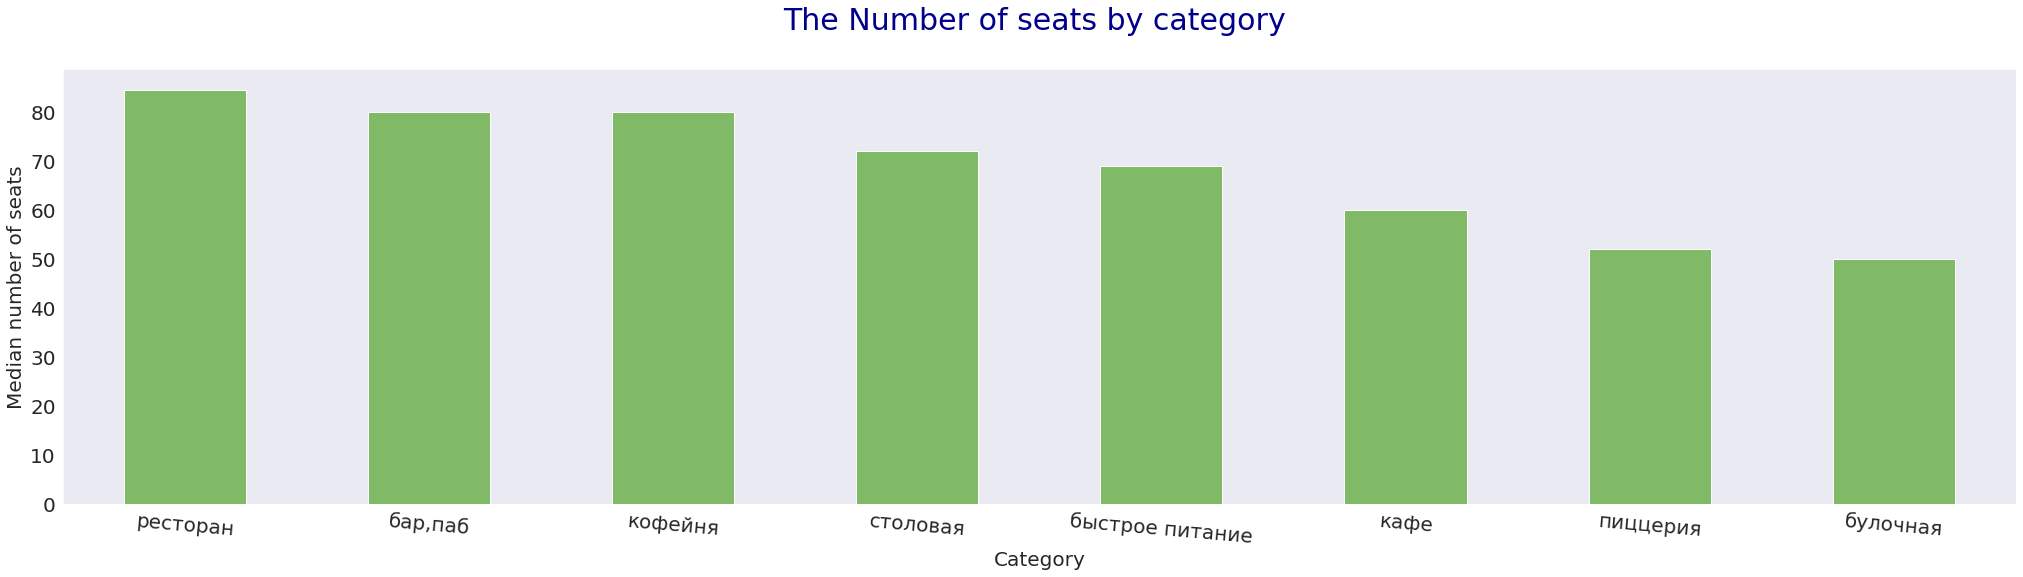

In [45]:

    fig = seats_group.plot(kind = 'bar', x='category', y='median', figsize=(35,8), rot = -5, legend = False, fontsize = 20, color = '#80ba67')
    fig.set_ylabel('Median number of seats',fontsize = 20)
    fig.set_xlabel('Category',fontsize = 20)
    fig.set_title('The Number of seats by category ' + "\n", fontsize = 30, color = 'DarkBlue')
    
; 

*When visualizing, we note that in bakeries and pizzerias there are almost two times fewer seats than in restaurants, bars, and pubs. Since pizzerias often work for delivery and bakeries also have similar specifics, it is difficult to draw conclusions based on this indicator.*

### Network establishments

In [46]:
chain_group = data.groupby(['category', 'chain'])['name'].count().reset_index()
chain_group.columns = ['category', 'chain','number']
chain_group.style.background_gradient('coolwarm')

,category,chain,number
0,"бар,паб",False,574
1,"бар,паб",True,158
2,булочная,False,95
3,булочная,True,153
4,быстрое питание,False,346
5,быстрое питание,True,222
6,кафе,False,1286
7,кафе,True,707
8,кофейня,False,676
9,кофейня,True,704


In [47]:
fig =(
   px.bar(chain_group, x = 'category', y='number', color='chain', 
          title='Distribution of chain and non-chain organozations',
         width=900, height=400,
         color_discrete_map={ 
                "True": "#f44336", "False": "#b85757"
            })
    
)   
fig.update_xaxes(tickangle=60)
fig.update_xaxes(title_text='Category') 
fig.update_yaxes(title_text='Number of catering establishments')
fig.show() 

*In terms of percentage, there are more chain pizzerias and bakeries than non-chain ones. The distribution of coffee houses is approximately equal between network and non-chain establishments, in other categories non-chain establishments prevail. However, in absolute terms, most chain cafes (707), coffee houses (704), and restaurants (703)* 

In [48]:
chain_rest = data[data['name']!='кафе'].groupby(['name','category'])['name'].agg(['count','first']).reset_index().sort_values(by = 'count',ascending=False).head(15)


In [49]:
chain_rest.columns = ['name','category','number','first']
chain_rest=chain_rest.drop(columns = ['first'],axis = 1)


In [50]:
chain_rest = chain_rest.replace({'кулинарная лавка братьев караваевых': 'караваевы'})
chain_rest

,name,category,number
5489,шоколадница,кофейня,115
2561,домино'с пицца,пиццерия,77
2531,додо пицца,пиццерия,74
1149,one price coffee,кофейня,71
5560,яндекс лавка,ресторан,67
407,cofix,кофейня,65
1288,prime,ресторан,49
3197,кофепорт,кофейня,42
3252,караваевы,кафе,38
4741,теремок,ресторан,36


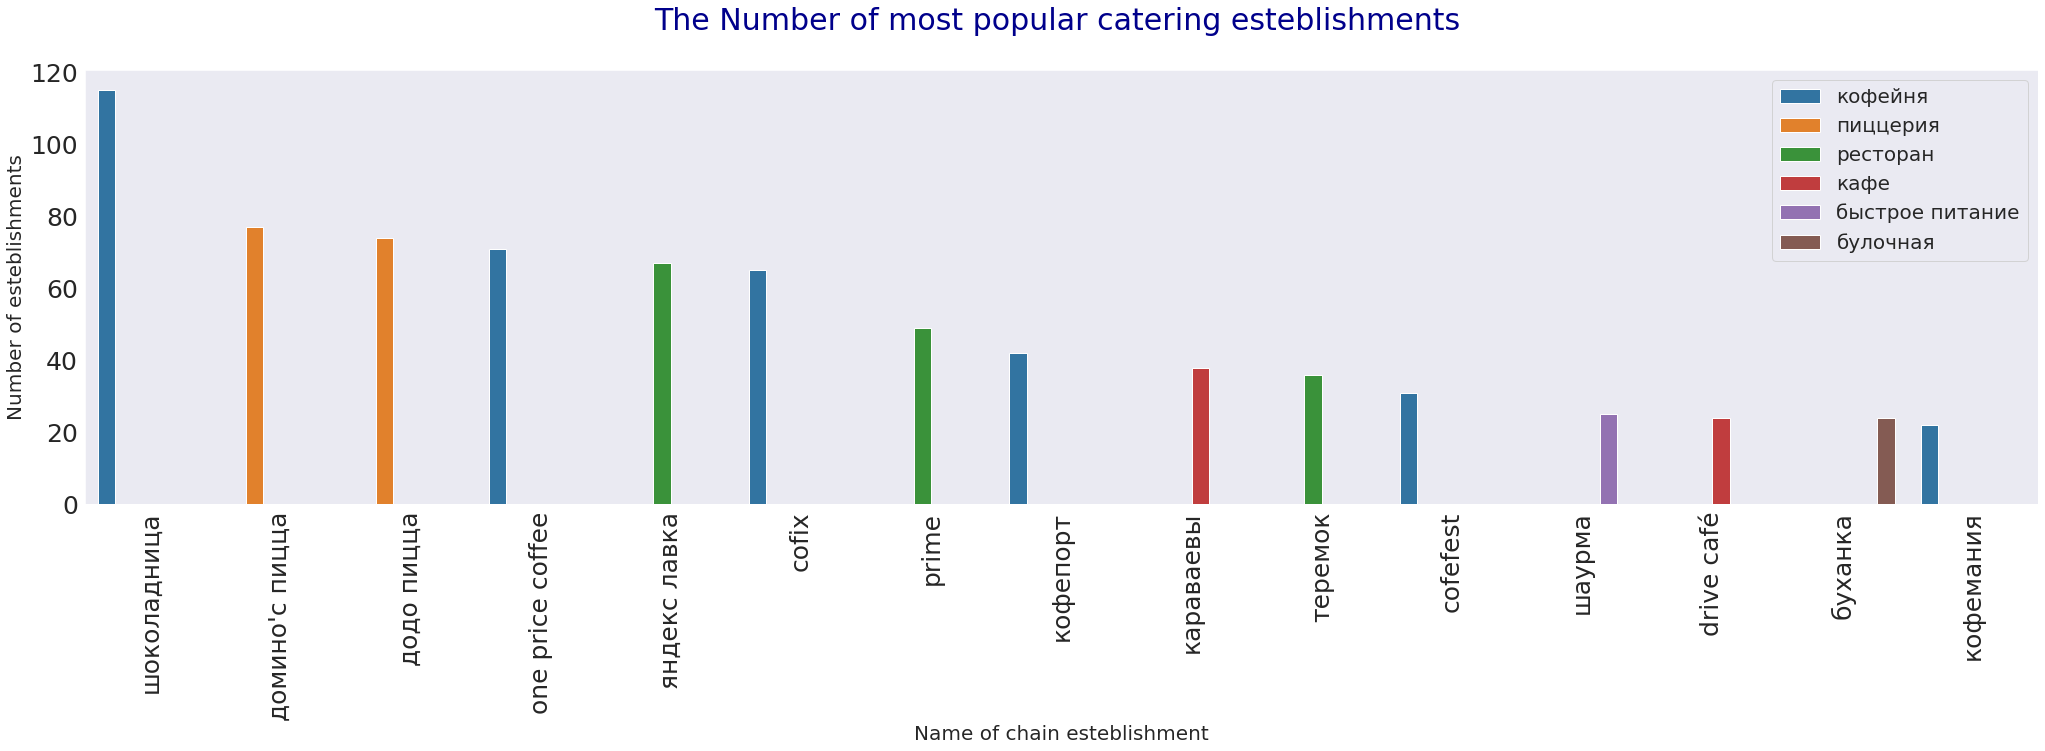

In [51]:
plt.figure(figsize=(35, 8))
fig = sns.barplot(data= chain_rest, x='name', y='number', hue = 'category')
fig.tick_params(axis='both', which='major', labelsize=25)
fig.set_xticklabels(fig.get_xticklabels(),rotation = 90)
fig.set_ylabel('Number of esteblishments',fontsize = 20)
fig.set_xlabel('Name of chain esteblishment',fontsize = 20)
fig.set_title('The Number of most popular catering esteblishments ' + "\n", fontsize = 30, color = 'DarkBlue')
plt.legend( fontsize='20');

*In the top five, there are 2 coffee chains and 2 pizzeria chains that mainly work for delivery, as well as one restaurant that also works for delivery, there are 4 coffee chains in the top 10, and three of them work on "take away".*

### Distribution of establishments by districts of Moscow

In [52]:
(
    data.pivot_table(index='district', values='name', aggfunc='count')
    .sort_values(by='name',ascending=False)
    .style.background_gradient('coolwarm')
)

,name
district,
Центральный административный округ,2186
Северо-Восточный административный округ,828
Южный административный округ,826
Северный административный округ,818
Западный административный округ,765
Восточный административный округ,715
Юго-Западный административный округ,648
Юго-Восточный административный округ,627
Северо-Западный административный округ,369


*The largest number of establishments is concentrated in the CAD (Central Administrative District 2186). The smallest number in NWAD (North-Western administrative district 369)
SEAD and SWAD (South-Western administrative district 648
South-Eastern Administrative District 627)*

*Let's consider the distribution of groups of establishments by districts*

In [53]:
district_group = (
    data.pivot_table(index='district', columns='category', values='name', aggfunc='count')
    .reset_index()
    
    
)
district_group.style.background_gradient('coolwarm')

category,district,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
0,Восточный административный округ,48,23,64,218,100,71,152,39
1,Западный административный округ,45,36,60,188,144,70,199,23
2,Северный административный округ,62,36,54,202,182,73,172,37
3,Северо-Восточный административный округ,57,28,79,228,157,66,173,40
4,Северо-Западный административный округ,23,12,27,86,62,40,102,17
5,Центральный административный округ,358,50,85,444,424,112,648,65
6,Юго-Восточный административный округ,37,12,61,217,87,55,135,23
7,Юго-Западный административный округ,37,26,57,195,94,64,158,17
8,Южный административный округ,65,25,81,215,130,73,194,43


In [54]:
replace_values = {'Восточный административный округ':'ВАО', 'Западный административный округ':'ЗАО','Северный административный округ':'САО', 'Северо-Восточный административный округ':'СВАО' , 'Северо-Западный административный округ':'СЗАО','Центральный административный округ':'ЦАО','Юго-Восточный административный округ':'ЮВАО', 'Юго-Западный административный округ':'ЮЗАО','Южный административный округ':'ЮАО'}
district_group = district_group.replace({'district': replace_values})

In [55]:
district_group['district']

0     ВАО
1     ЗАО
2     САО
3    СВАО
4    СЗАО
5     ЦАО
6    ЮВАО
7    ЮЗАО
8     ЮАО
Name: district, dtype: object

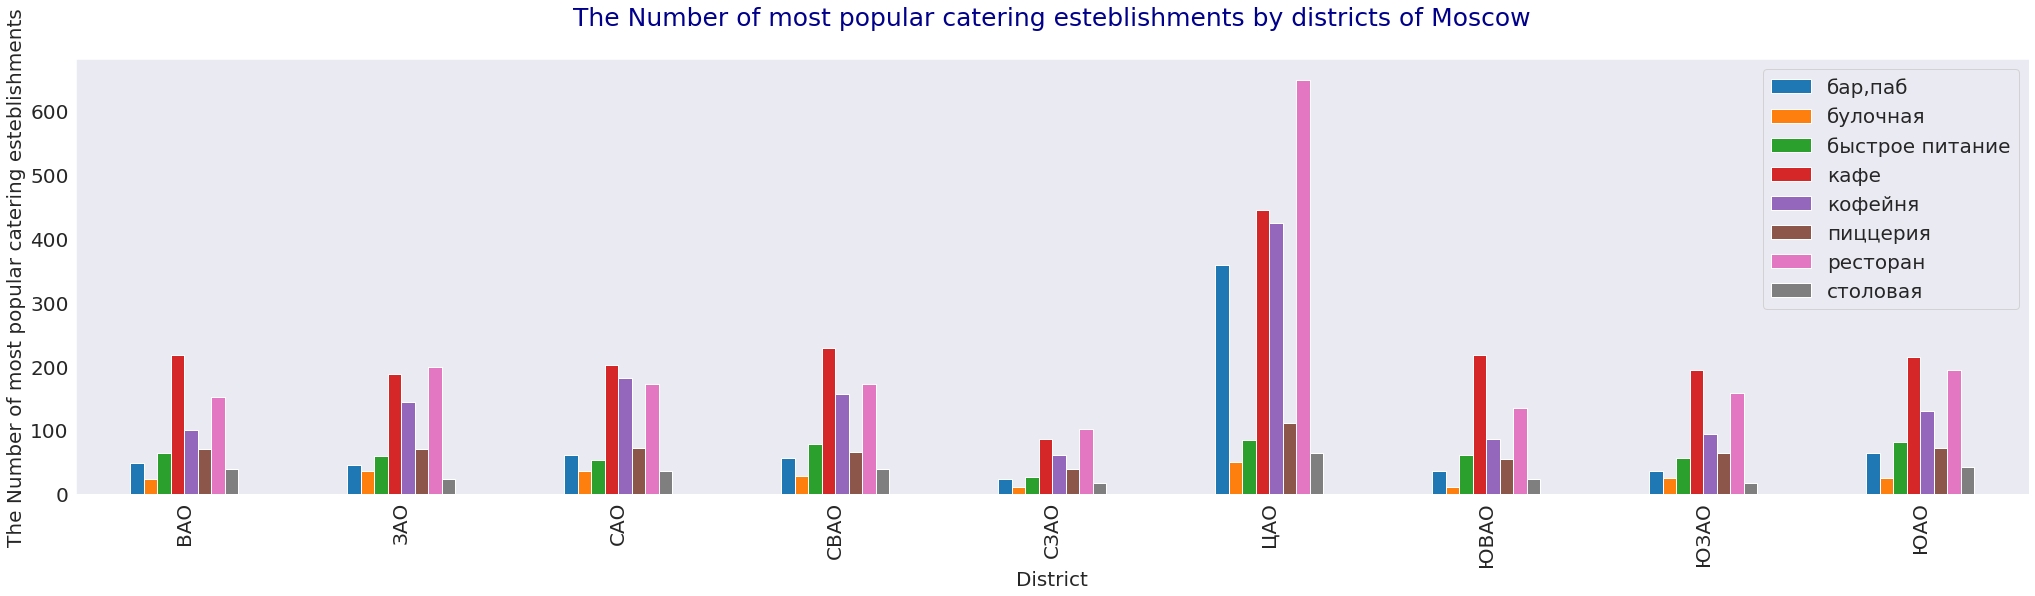

In [56]:
fig=(
   district_group
    .plot(x='district',figsize=(35,8),
          kind='bar',
          fontsize = 20)
      
)
fig.set_title('The Number of most popular catering esteblishments by districts of Moscow' + "\n", fontsize = 25, color = 'DarkBlue')
fig.set_ylabel('The Number of most popular catering esteblishments',fontsize = 20)
fig.set_xlabel('District',fontsize = 20)
plt.legend( fontsize='20');

*In all categories of establishments, the CAD is in the lead. In NWAD, on the other hand, there are fewer establishments. In the category of coffee houses, we single out the South-Eastern Administrative District (87) and South-Western Administrative District (94) by the smallest number. We note a small number of canteens in the South-Western and North-West Administrative Districts.*

### Рейтинг заведений

In [57]:
group_rating = (
    data.pivot_table(index='category', values='rating', aggfunc=['count','mean','median','min','max'])
    .reset_index()
)
group_rating.columns = ['category','number','mean_score','median_score','min','max']

group_rating.sort_values(by='mean_score',ascending=False).style.background_gradient('coolwarm')

,category,number,mean_score,median_score,min,max
0,"бар,паб",732,4.395219,4.400000,1.100000,5.000000
5,пиццерия,624,4.300801,4.300000,1.000000,5.000000
6,ресторан,1933,4.292550,4.300000,1.000000,5.000000
1,булочная,248,4.276210,4.300000,1.300000,5.000000
4,кофейня,1380,4.275362,4.300000,1.400000,5.000000
7,столовая,304,4.217763,4.300000,1.000000,5.000000
3,кафе,1993,4.152383,4.300000,1.000000,5.000000
2,быстрое питание,568,4.058627,4.200000,1.100000,5.000000


*The median and average rating of establishments is approximately the same for all categories, but we note the best of the minimum ratings for coffee houses. They stand out from all other types of establishments: 1.4 in a sample of 1380 establishments, that is, customers are less demanding of coffee houses and appreciate them.*

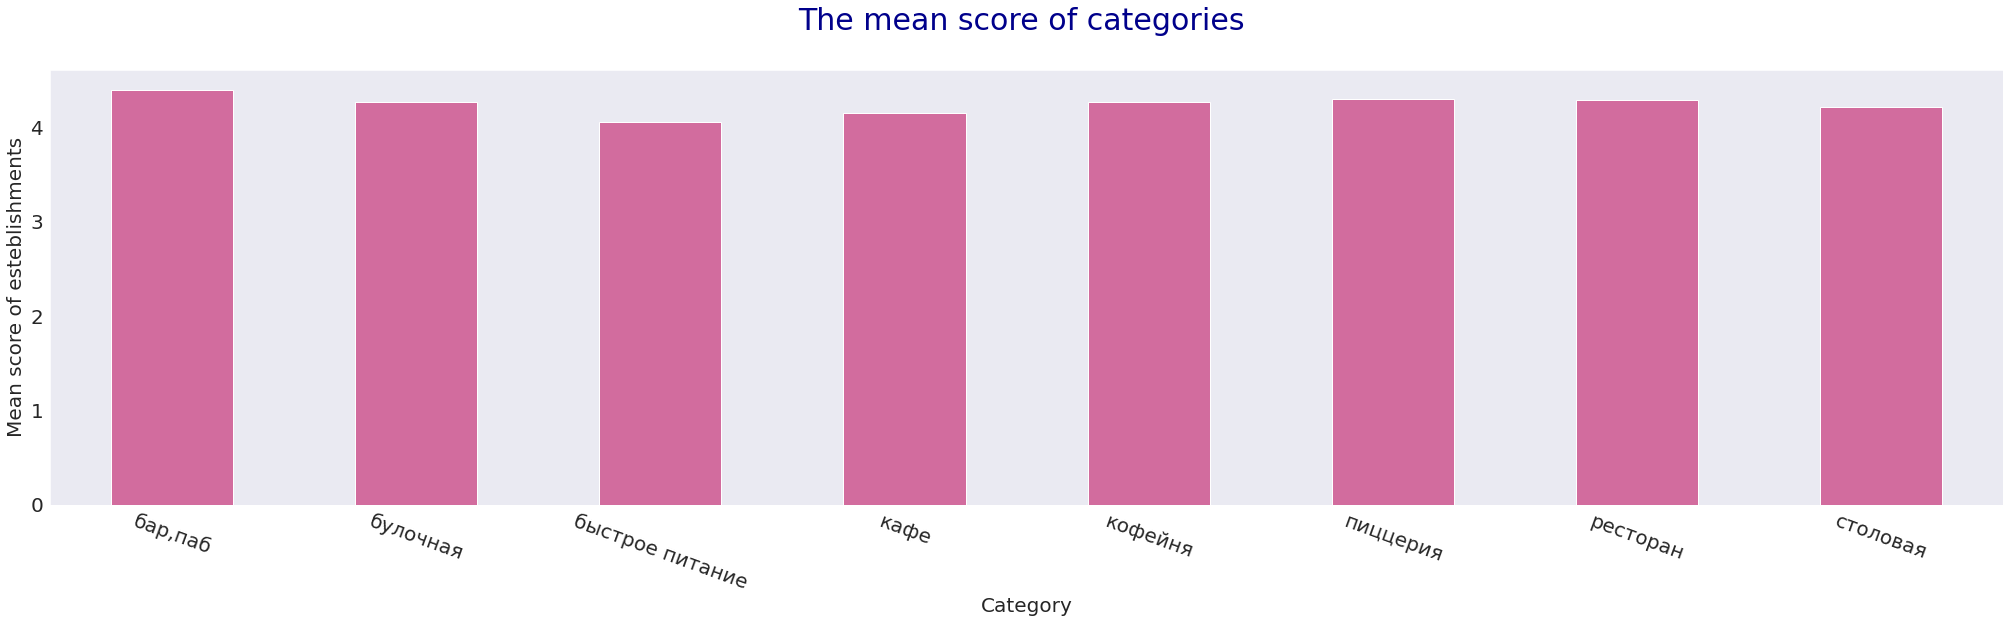

In [58]:
fig = group_rating.plot(kind = 'bar',x='category', y='mean_score', figsize=(35,8), rot = -20, legend = False, fontsize = 20, color = '#d26c9e')
fig.set_ylabel('Mean score of esteblishments',fontsize = 20)
fig.set_xlabel('Category',fontsize = 20)
fig.set_title('The mean score of categories ' + "\n", fontsize = 30, color = 'DarkBlue');

*From the graph of the average rating, we conclude that with a uniform rating, it is slightly higher for bars and the least for fast food.*  

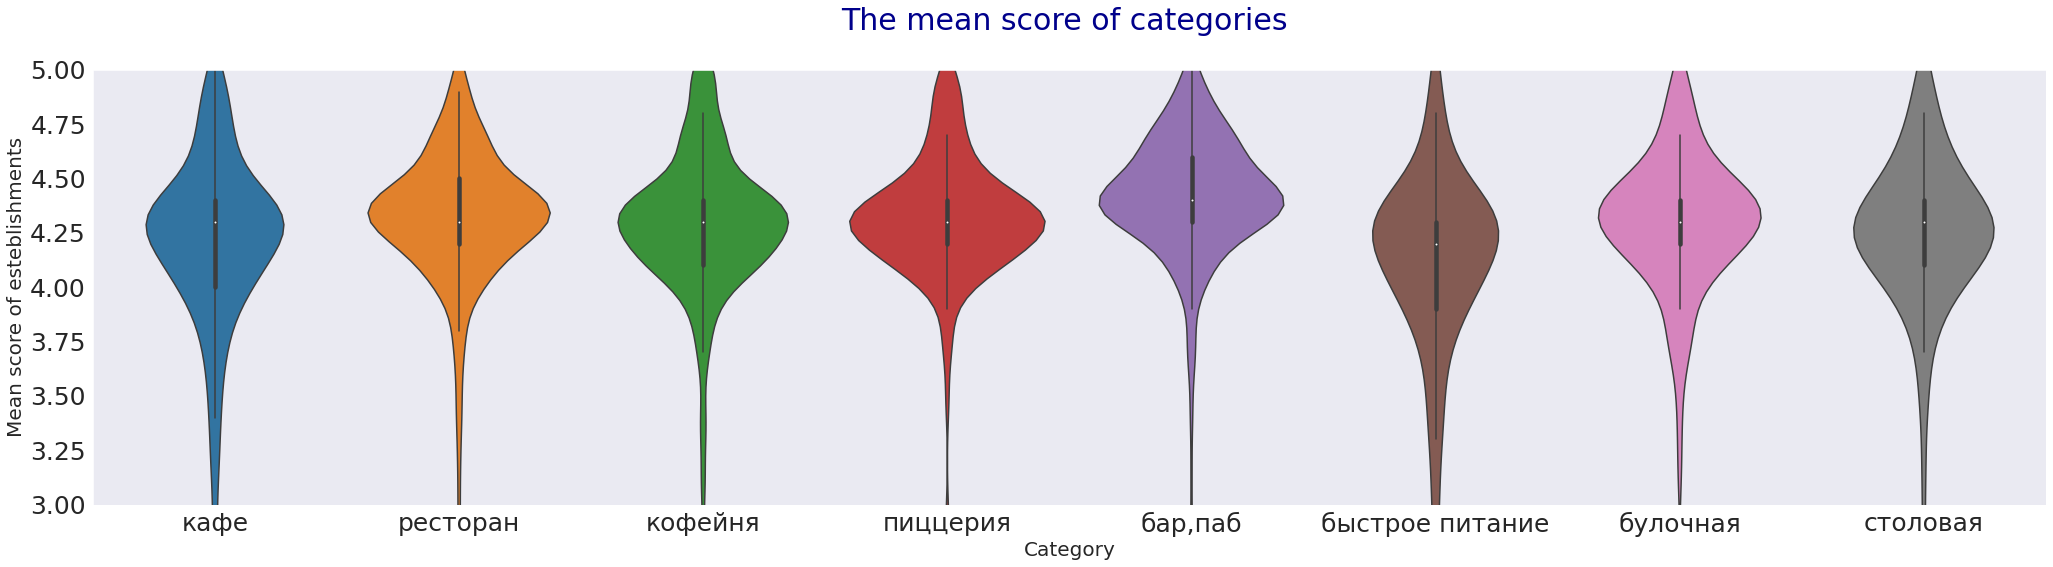

In [59]:
plt.figure(figsize=(35, 8))
fig = sns.violinplot(x='category', y='rating', data=data, fontsize = 40)
fig.tick_params(axis='both', which='major', labelsize=25)
fig.set_ylabel('Mean score of esteblishments',fontsize = 20)
fig.set_xlabel('Category',fontsize = 20)
fig.set_title('The mean score of categories ' + "\n", fontsize = 30, color = 'DarkBlue')
plt.ylim(3,5);


*The violin graph for the restaurant ratings also shows the uniformity of the ratings, but everything also indicates that the ratings of fast food are slightly lower than the rest, as well as the presence of a sufficient number of low ratings among cafes.*

*Let's consider the distribution of the rating by districts on the map:*

In [60]:
district_mean = data.groupby('district').agg({'rating':'mean'}).reset_index()

In [61]:
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

FileNotFoundError: ignored

In [ ]:
from folium import Map, Choropleth

state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)


Choropleth(
    geo_data=state_geo,
    data=district_mean,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Median Rating by District',
).add_to(m)


m

*As we can see from the map, the establishments with the highest rating are located in the city center, in second place are the NAD, and NWAD, they also have a high average rating, but the worst with the quality of institutions according to user ratings is in the SEAD and NEAD*

### Distribution on the streets of Moscow

In [62]:
street_rest = (
    data.pivot_table(index='street', values='name', aggfunc=['count'])
    .reset_index()
)
street_rest.columns = ['street','number']

street_rest.sort_values(by='number',ascending=False).head(15).style.background_gradient('coolwarm')

,street,number
1063,проспект Мира,175
753,Профсоюзная улица,115
509,Ленинский проспект,99
1060,проспект Вернадского,93
358,Дмитровское шоссе,85
440,Каширское шоссе,70
288,Варшавское шоссе,68
508,Ленинградское шоссе,66
507,Ленинградский проспект,66
530,Люблинская улица,56


*The largest number of establishments is represented on Prospekt Mira and Profsoyuznaya Street. There are also a large number of establishments on the longest streets of Moscow:
<br/>Leninsky prospect 99
<br/>Prospect Vernadskogo 93
<br/>Dmitrovskoe shosse 85*

*Breakdown of Top 15 streets by category*

In [63]:
street_category = (
    data.pivot_table(index='street', columns='category', values='name', aggfunc='count')
    .reset_index()
    
)

In [64]:
street_rest = street_rest.merge(street_category, on='street', how='left')

In [65]:
street_rest.sort_values(by= 'number', ascending = False).head(15).style.background_gradient('coolwarm')

,street,number,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
1063,проспект Мира,175,11.000000,4.000000,21.000000,48.000000,35.000000,11.000000,43.000000,2.000000
753,Профсоюзная улица,115,6.000000,4.000000,15.000000,29.000000,18.000000,15.000000,25.000000,3.000000
509,Ленинский проспект,99,10.000000,3.000000,2.000000,20.000000,23.000000,5.000000,31.000000,5.000000
1060,проспект Вернадского,93,5.000000,1.000000,12.000000,20.000000,14.000000,11.000000,28.000000,2.000000
358,Дмитровское шоссе,85,5.000000,2.000000,10.000000,21.000000,11.000000,8.000000,24.000000,4.000000
440,Каширское шоссе,70,1.000000,nan,10.000000,15.000000,16.000000,5.000000,18.000000,5.000000
288,Варшавское шоссе,68,6.000000,nan,7.000000,12.000000,13.000000,4.000000,20.000000,6.000000
508,Ленинградское шоссе,66,4.000000,2.000000,5.000000,12.000000,13.000000,3.000000,24.000000,3.000000
507,Ленинградский проспект,66,13.000000,2.000000,2.000000,7.000000,18.000000,5.000000,18.000000,1.000000
530,Люблинская улица,56,4.000000,nan,5.000000,23.000000,11.000000,1.000000,10.000000,2.000000


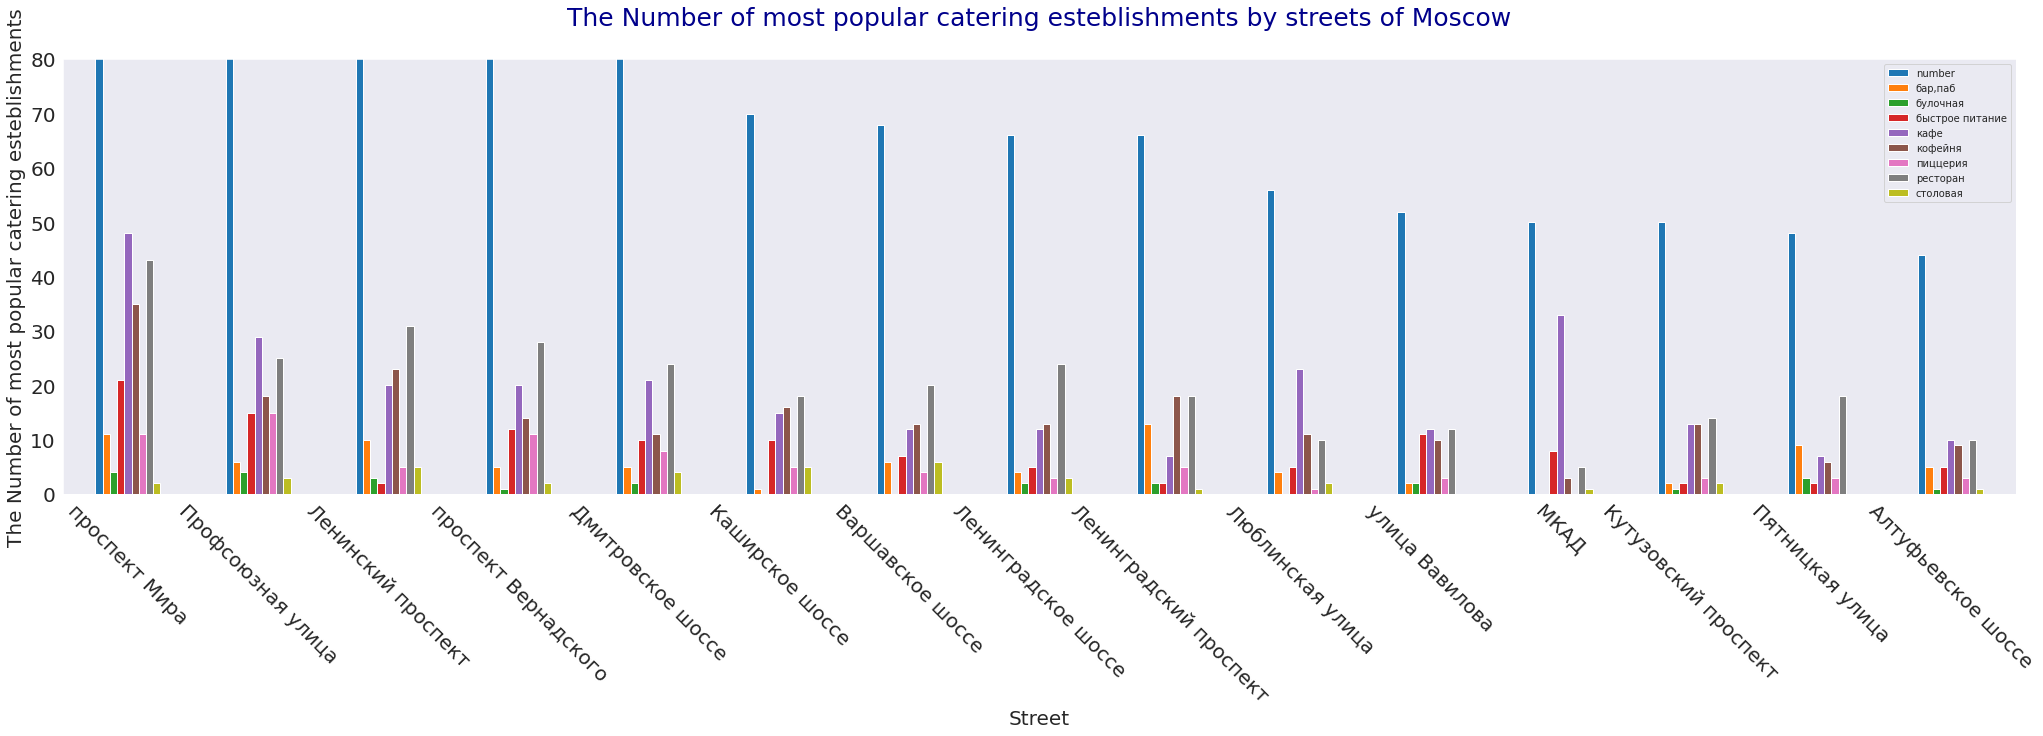

In [66]:
fig=(
   street_rest
    .sort_values(by='number',ascending=False)
    .head(15)
    .plot(x='street', figsize=(35,8), rot=-45,
          kind='bar',
          fontsize = 20, ylim =(0,80))
      
)
fig.set_title('The Number of most popular catering esteblishments by streets of Moscow' + "\n", fontsize = 25, color = 'DarkBlue')
fig.set_ylabel('The Number of most popular catering esteblishments',fontsize = 20)
fig.set_xlabel('Street',fontsize = 20);

*In most categories of the top 15 streets with catering establishments, Mira Avenue is also in the lead. Bars with pubs are located more on the Leningrad highway, and canteens on the Warsaw highway, which is apparently due to a large number of industrial and administrative facilities.
There are few bakeries everywhere, as well as canteens. On the Moscow Ring Road, which is logical, apart from cafes, establishments are also poorly represented. In general, all establishments gravitate toward the longest streets*

*Let's find the streets with one place on them*

In [67]:
one_org_street = data.groupby('street')['name'].agg(['count','first']).reset_index().sort_values(by='count')

In [68]:
one_org_street.columns = ['street','number','name']

In [69]:
one_org_street = one_org_street[one_org_street['number']==1]

In [70]:
data = data.merge(one_org_street, on=['street','name'],how= 'left')

In [71]:
data['number'] = data['number'].fillna(0) 

In [72]:
data[data['number']==1].groupby('category')['name'].count().sort_values(ascending=False)

category
кафе               150
ресторан            94
кофейня             91
бар,паб             40
столовая            39
быстрое питание     28
пиццерия            15
булочная            10
Name: name, dtype: int64

In [73]:
data[(data['number']==1)&(data['middle_avg_bill']!=-55)].groupby('category').agg({'name':'count', 'middle_avg_bill':['mean','median'] })

name middle_avg_bill        
                count            mean  median
category                                     
бар,паб            17     1279.411765  1250.0
быстрое питание    10      657.500000   450.0
кафе               50      640.640000   500.0
кофейня            16      587.500000   487.5
пиццерия           11      732.272727   600.0
ресторан           41     1395.121951  1250.0
столовая           25      279.800000   270.0

In [74]:
one_r_dist = data[data['number']==1].groupby('district')['name'].count()

In [75]:
one_r_cat = data[data['number']==1].pivot_table(index='district', columns='category', values='name',aggfunc='count').reset_index()

In [76]:
one_r_dist = one_r_cat.merge(one_r_dist, on= 'district', how='left')

In [77]:
one_r_dist = one_r_dist.rename(columns={'name':'total'})

In [78]:
one_r_dist.sort_values(by='total', ascending=False).style.background_gradient('coolwarm')

,district,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,total
5,Центральный административный округ,23.000000,2.000000,4.000000,35.000000,34.000000,2.000000,33.000000,7.000000,140
2,Северный административный округ,2.000000,3.000000,1.000000,22.000000,16.000000,1.000000,8.000000,7.000000,60
0,Восточный административный округ,2.000000,nan,7.000000,22.000000,9.000000,6.000000,7.000000,6.000000,59
3,Северо-Восточный административный округ,2.000000,nan,5.000000,14.000000,10.000000,2.000000,15.000000,8.000000,56
8,Южный административный округ,nan,1.000000,2.000000,19.000000,5.000000,1.000000,7.000000,5.000000,40
1,Западный административный округ,4.000000,2.000000,3.000000,14.000000,3.000000,2.000000,10.000000,1.000000,39
6,Юго-Восточный административный округ,5.000000,1.000000,2.000000,14.000000,7.000000,1.000000,5.000000,2.000000,37
4,Северо-Западный административный округ,1.000000,nan,1.000000,4.000000,3.000000,nan,8.000000,2.000000,19
7,Юго-Западный административный округ,1.000000,1.000000,3.000000,6.000000,4.000000,nan,1.000000,1.000000,17


*Establishments located 1 on the same street are not much different from others: according to the average check, the establishments approximately correspond to all the rest in the dataset. Most of these establishments are in the Central Administrative District, since there are fewer streets in the center, and it is likely that there will be only one establishment. There is also a share of canteens, which is explained by the possible location in industrial areas, and least of all bakeries.*  

### Распределение средних чеков по округам

In [79]:
district_mean_bill = data[data['middle_avg_bill']!=-55].groupby('district').agg({'middle_avg_bill':'median'}).reset_index()


In [80]:
district_mean_bill['district'] = ['ВАО', 'ЗАО', 'САО', 'СВАО', 'СЗАО', 'ЦАО', 'ЮВАО', 'ЮЗАО', 'ЮАО']

In [81]:
state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m2 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=district_mean_bill,
    columns=['district', 'middle_avg_bill'],
    key_on='properties.ref',
    fill_color='PuRd',
    fill_opacity=0.8,
    legend_name='Median Average Bill by District',
).add_to(m2)
m2

NameError: ignored

*The highest average check corresponds to the high cost of districts (WAD and CAD). However, we separately note the lower cost of the average check in the North-East Administrative District.*

### Worst rated establishments

*Let's consider the establishments with the worst rating*

In [82]:
data.sort_values(by='rating').head(15).style.background_gradient('coolwarm')

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7,number
6301,омореморе,ресторан,"Москва, Ленинский проспект, 108, стр. 1",Западный административный округ,"ежедневно, 09:00–23:00",55.669702,37.512464,1.000000,nan,nan,-55.000000,-55.000000,True,290,Ленинский проспект,False,0.000000
7064,pho street,кафе,"Москва, Новоясеневский проспект, 11",Юго-Западный административный округ,"ежедневно, 10:00–22:00",55.606584,37.536446,1.000000,nan,nan,-55.000000,-55.000000,True,70,Новоясеневский проспект,False,0.000000
5466,добро пожаловать,ресторан,"Москва, Рябиновая улица, 47, стр. 1",Западный административный округ,пн-пт 08:00–16:30,55.695988,37.424938,1.000000,nan,nan,-55.000000,-55.000000,False,80,Рябиновая улица,False,0.000000
5382,улей,столовая,"Москва, Западный административный округ, район Раменки, микрорайон Ленинские Горы, 1, стр. 40",Западный административный округ,пн-пт 10:00–18:00,55.706255,37.521231,1.000000,nan,nan,-55.000000,-55.000000,False,-55,Западный административный округ,False,0.000000
5421,стар,кафе,"Москва, Веерная улица, 24Г",Западный административный округ,"пн,вт,ср,чт,вс 11:00–22:00",55.708703,37.484800,1.000000,nan,nan,-55.000000,-55.000000,False,-55,Веерная улица,False,0.000000
5261,тесто и сыр,пиццерия,"Москва, Рязанский проспект, 2к2",Юго-Восточный административный округ,"ежедневно, 10:00–22:00",55.729974,37.732291,1.000000,nan,nan,-55.000000,-55.000000,False,-55,Рязанский проспект,False,0.000000
3923,сетунь,ресторан,"Москва, 1-й Сетуньский проезд, 10с1",Западный административный округ,"ежедневно, 11:00–23:00",55.733738,37.536305,1.000000,nan,nan,-55.000000,-55.000000,False,-55,1-й Сетуньский проезд,False,1.000000
5778,универ,кафе,"Москва, Западный административный округ, район Раменки, микрорайон Ленинские Горы, 1, стр. 51",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–18:00,55.697720,37.538234,1.000000,nan,nan,-55.000000,-55.000000,False,-55,Западный административный округ,False,0.000000
7035,встреча,кафе,"Москва, Новоясеневский проспект, 2Б, стр. 2",Юго-Западный административный округ,пн-чт 10:00–00:00; пт-вс 10:00–01:00,55.616764,37.509166,1.100000,nan,nan,-55.000000,-55.000000,True,40,Новоясеневский проспект,False,0.000000
6354,баже,быстрое питание,"Москва, Профсоюзная улица, 126к3",Юго-Западный административный округ,"ежедневно, 10:00–22:00",55.630458,37.517013,1.100000,nan,nan,-55.000000,-55.000000,False,-55,Профсоюзная улица,False,0.000000


*Нанесем их на карту*

In [83]:
from folium import Marker, Map

moscow_lat, moscow_lng = 55.751244, 37.618423

m5 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

def create_marker(row):
    Marker([row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}"
    ).add_to(m5)

data.sort_values(by='rating').head(15).apply(create_marker, axis=1)

m5

*Of the top 15 worst establishments in the city, 6 are located in WAD, and 5 are located in the neighboring SWAD, most of the top 15 are cafes (7), restaurants (4), 2 fast food restaurants, a pizzeria, and a canteen.*

### 24 hour establishments

*Next, we analyze the round-the-clock establishments*

In [84]:
chain_group_24 = data.groupby(['category', 'chain','is_24/7'])['name'].count().reset_index()
chain_group_24.columns = ['category', 'chain','is_24/7','number']
chain_group_24.style.background_gradient('coolwarm')

,category,chain,is_24/7,number
0,"бар,паб",False,False,532
1,"бар,паб",False,True,42
2,"бар,паб",True,False,148
3,"бар,паб",True,True,10
4,булочная,False,False,77
5,булочная,False,True,18
6,булочная,True,False,147
7,булочная,True,True,6
8,быстрое питание,False,False,250
9,быстрое питание,False,True,96


In [85]:
fig =(
   px.bar(chain_group_24, x = 'category', y='number', color='is_24/7', 
          title='Distribution of round-the-clock and common organozations',
         width=900, height=400,
         color_discrete_map={ 
                "True": "#f44336", "False": "#b85757"
            })
    
)   
fig.update_xaxes(tickangle=60)
fig.update_xaxes(title_text='Category') 
fig.update_yaxes(title_text='Number of catering establishments')
fig.show() 

*Most of all round-the-clock, both chain and non-chain cafes, and restaurants are in second place, but in the segment of pubs and bars there are relatively few round-the-clock establishments, and if we consider the opening of a pub or bar, then we could pay attention to a round-the-clock establishment in this segment.*

<div style="border:solid green 2px; padding: 20px">


**Conclusions:**

1. The dataset contains 8 types of catering establishments: restaurants, cafés, bars/pubs, coffee shops, pizzerias, bakeries, fast food, and canteens. Most of all, the data include cafés and restaurants, followed by coffee houses. Least of all bakeries and canteens.
2. The highest average bill in the bar, pub (1260), and restaurant (1240) categories. Low bill for fast food (421) and canteens (316). The data sample also attracts attention: information for this indicator for bakeries is tiny, as well as for coffee houses.
3. According to the seats, establishments are distributed on average from 50 to 85 seats in different categories. The difference is small, but bakeries and pizzerias have almost half as many seats as restaurants, bars-and-pubs. Since pizzerias often work for delivery, and takeaway bakeries.
4. The ratio of chain and non-chain establishments are different, for example, pizzerias are dominated by chains, coffee houses are represented in approximately equal proportions, and the share of chain canteens is the smallest. Of the top 15 networks represented in the top five, there are 2 coffee chains and 2 pizzeria chains, mainly working for delivery, as well as one conditional restaurant that also works for delivery, in the top 10 there are 4 coffee chains, of which three operate on "take away".
5. Most establishments are located in the city center, least of all in the North-Western Administrative District (North-Western Administrative District 369), South-Eastern Administrative District, and South-Western Administrative District (South-Western Administrative District 648, South-Eastern Administrative District 627). In all categories of establishments, the CAD is in the lead. On the other hand, NWAD has the fewest establishments of all types. In the category of coffee houses, we single out the South-Eastern Administrative District (87) and South-Western Administrative District (94) by the smallest number. We note a few canteens in the South-West and North-West.
6. The median and average rating of establishments is approximately the same for all categories, but for the best of the minimum ratings, we note the rating values ​​for coffee houses. They stand out from all other types of establishments: 1.4 in a sample of 1380 establishments, that is, customers are less demanding of coffee houses and appreciate them. The institutions with the highest rating are located in the city center, the second place is in the NAD, NWAD, also has a high average rating, but the worst in terms of quality of institutions according to user ratings is in the SEAD and NEAD.
7. The highest average check corresponds to expensive and elite districts and districts (WAD and CAD). The situation is similar with the lowest average check (SEAD and SAD).
8. Of the top 15 worst establishments in the city, 6 are located in WAD, and 5 are located in the neighboring SWAD, most of the top 15 are cafés (7), restaurants (4), 2 fast food, a pizzeria, and a canteen.
9. Most of all round-the-clock, both chain and non-chain cafés, and restaurants are in second place, but in the segment of pubs and bars there are relatively few round-the-clock establishments, and if we consider the opening of a pub or bar, then one could pay attention to a round-the-clock establishment in this segment.

<div style="border:solid blue 2px; padding: 20px">

    
**Recommendations:**
    
1. Based on the foregoing, of all categories, the most priority are:
    - coffee houses, as they require lower costs, while visitors are less demanding of them, and you can work to take away
    - canteens, as there are few of them in some districts, and they are always in demand at dinners
    - pubs, and bars, as they do not require large expenses and are also unevenly distributed throughout the city
2. We will consider the location and specification for coffee houses separately, as an alternative:
- Canteens can be opened in the west and southwest direction, as this direction is in the top 15 worst establishments, in addition, there are many universities, and hostels in this direction and there is a shortage of cheap and high-quality establishments.
- Pubs, bars: there has already been a shortage of round-the-clock bars, the location of the North-West and South-East Administrative Districts is in the middle price category, and the South-West Administrative District is in the above-average category.     

## Detailed study. (Coffee houses)
<a id="cofee"></a>

*Let's analyze the coffee house market in more detail, especially since the customer is right in choosing this direction to start in the catering market*

### Distribution of coffee houses in the city

*Let's put clusters of coffee houses with a rating on the map to see the concentration of establishments* 

In [86]:
from folium import Map, Marker
from folium.plugins import MarkerCluster


moscow_lat, moscow_lng = 55.751244, 37.618423


m3 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m3)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)


data[data['category'] == 'кофейня'].apply(create_clusters, axis=1)

m3

In [87]:
print('Number of cofeeshops in the dataset: {}'.format(data[data['category']=='кофейня']['name'].count()))

Number of cofeeshops in the dataset: 1380


In [88]:
cofee_group =(
    data[data['category']=='кофейня'].groupby('district')['name']
    .count()
    .reset_index()
    .rename(columns={'name':'number'})
    .sort_values(by='number', ascending=False)
)    
cofee_group.style.background_gradient('coolwarm')

,district,number
5,Центральный административный округ,424
2,Северный административный округ,182
3,Северо-Восточный административный округ,157
1,Западный административный округ,144
8,Южный административный округ,130
0,Восточный административный округ,100
7,Юго-Западный административный округ,94
6,Юго-Восточный административный округ,87
4,Северо-Западный административный округ,62


*In total, 1380 coffee houses are represented in the dataset, most of all 424 establishments are located in the city center, top 3 of the least coffee areas of the Northwestern Administrative District (62), South-Eastern Administrative District (87), South-Western Administrative District (94).*

### Coffee shop opening hours

In [89]:
cofee_group_24 = data[data['category']=='кофейня'].groupby(['district','is_24/7'])['name'].count().reset_index()

In [90]:
fig =(
   px.bar(cofee_group_24, x = 'district', y='name', color='is_24/7', 
          title='The Number of round-the-clock and common coffeeshops by Moscow districs',
         width=900, height=700,
         color_discrete_map={ 
                "True": "#f44336", "False": "#b85757"
            })
    
)   
fig.update_xaxes(tickangle=60)
fig.update_xaxes(title_text='Category') 
fig.update_yaxes(title_text='The Number of coffeeshops')
fig.show() 

In [91]:
data[data['category']=='кофейня']['hours'].value_counts(). head(25)

ежедневно, 10:00–22:00                                  140
ежедневно, 08:00–22:00                                   60
ежедневно, круглосуточно                                 59
ежедневно, 09:00–22:00                                   57
пн-пт 08:00–19:00                                        46
пн-пт 08:00–21:00; сб,вс 09:00–21:00                     46
пн-пт 08:00–22:00; сб,вс 09:00–22:00                     42
ежедневно, 09:00–21:00                                   42
ежедневно, 08:00–21:00                                   36
пн-пт 08:00–18:30                                        34
ежедневно, 08:00–23:00                                   27
ежедневно, 07:00–22:00                                   25
пн-пт 08:00–22:00; сб,вс 10:00–22:00                     23
ежедневно, 08:00–20:00                                   23
ежедневно, 10:00–21:00                                   19
пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00–22:00     16
пн-пт 08:00–20:00                       

*The graph shows that there are not so many round-the-clock coffee shops, however, coffee is a morning drink that people run before work or after a long night or as an after-party, but as you can see from the table, most establishments work from 8:00 in the morning, there may be a need to start at an hour earlier, since only 39 establishments are open from seven in the morning*

### Cost of a cup of coffee

*Let's consider the cost of a cup of cappuccino*

In [92]:
mean_cofee = (
    data[data['middle_coffee_cup']!=-55].groupby('district')['middle_coffee_cup']
    .agg(['count','mean','median'])
    .reset_index()
    .sort_values(by='mean',ascending=False)
    
    
)
mean_cofee.style.background_gradient('coolwarm')

,district,count,mean,median
1,Западный административный округ,49,188.285714,185.000000
5,Центральный административный округ,163,185.950920,190.000000
7,Юго-Западный административный округ,35,183.485714,197.000000
3,Северо-Восточный административный округ,60,165.333333,162.500000
2,Северный административный округ,70,161.171429,157.000000
4,Северо-Западный административный округ,24,160.458333,150.000000
8,Южный административный округ,46,157.826087,149.500000
6,Юго-Восточный административный округ,34,144.176471,142.500000
0,Восточный административный округ,41,140.024390,135.000000


*The leaders in terms of the cost of a cup of cappuccino are the elite districts: the Central Administrative District, the South-West Administrative District and the West Administrative District about 190 rubles, the South-Eastern Administrative District and the East Administrative District are the cheapest, about 140 rubles.*

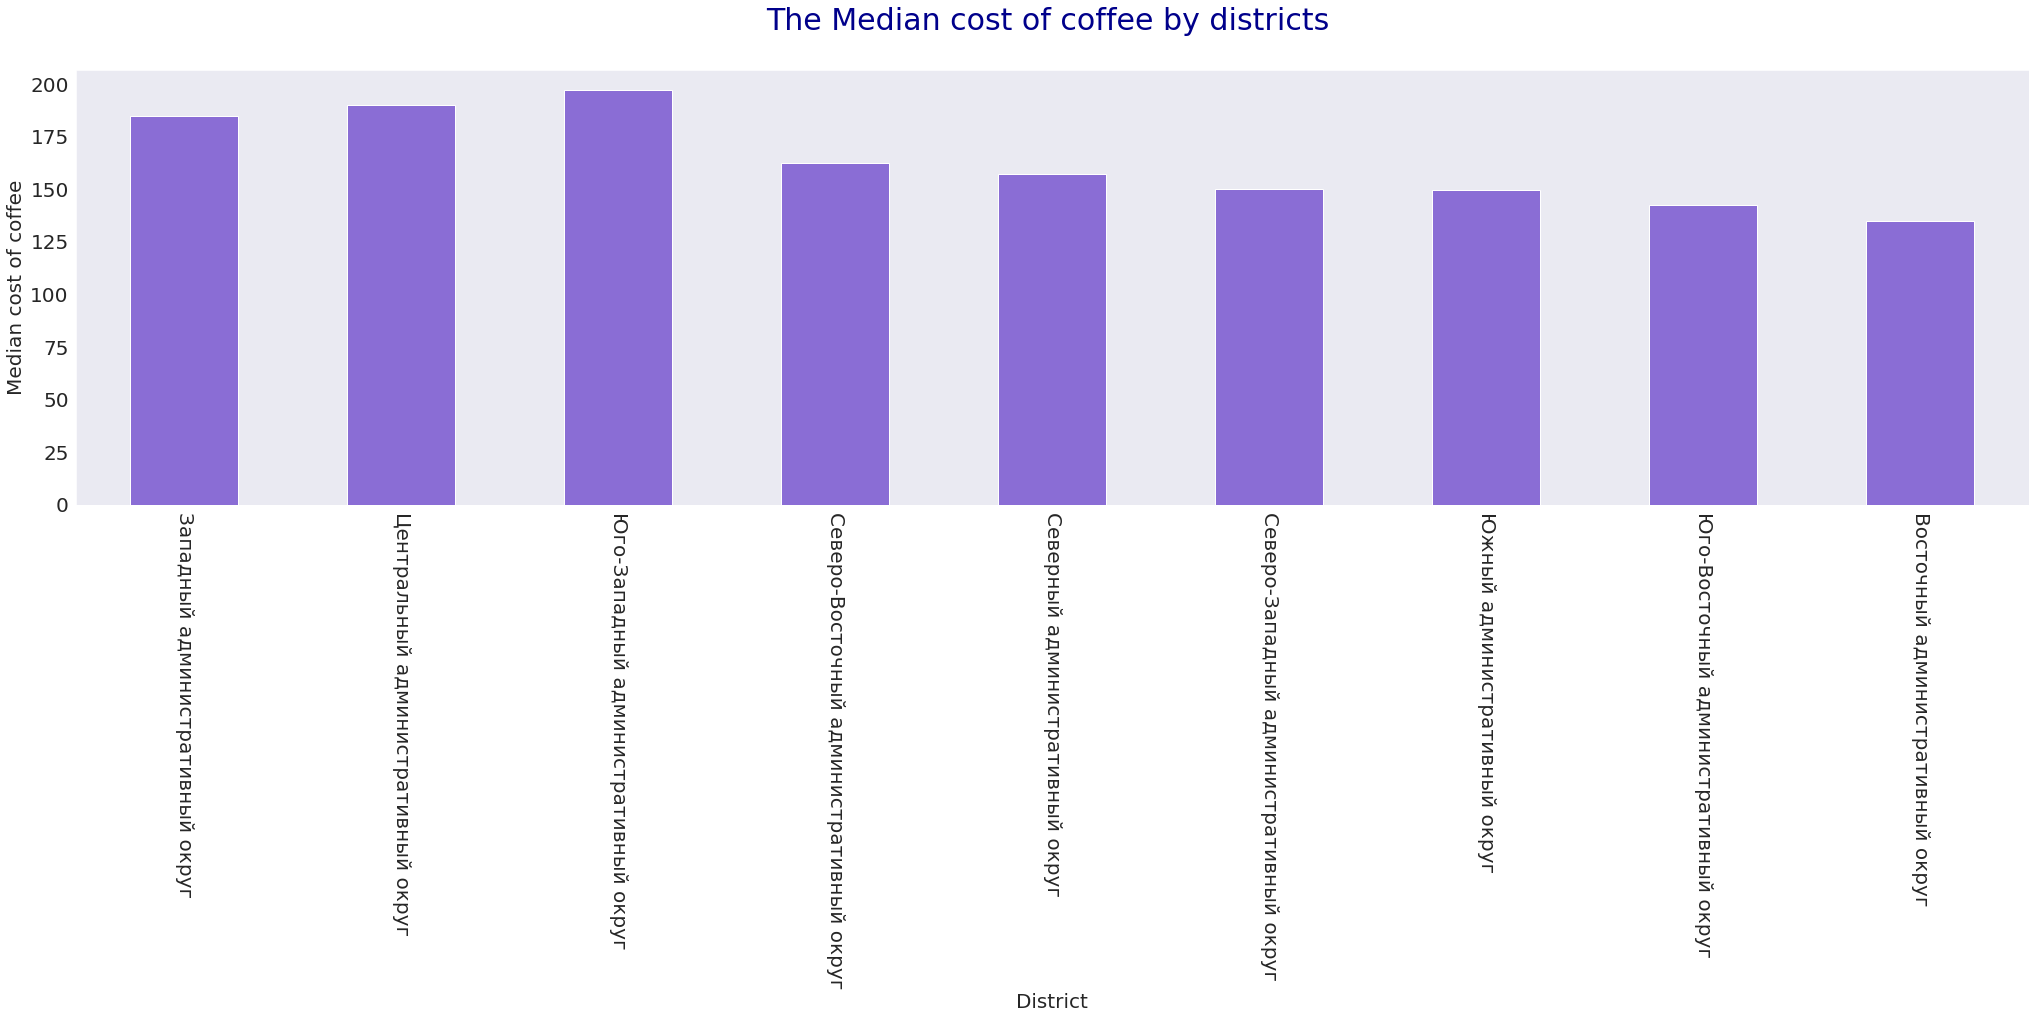

In [93]:
fig = mean_cofee.plot(kind = 'bar',x='district', y='median', figsize=(35,8), rot = -90, legend = False, fontsize = 20, color = '#8a6dd5')
fig.set_ylabel('Median cost of coffee',fontsize = 20)
fig.set_xlabel('District',fontsize = 20)
fig.set_title('The Median cost of coffee by districts ' + "\n", fontsize = 30, color = 'DarkBlue');

In [94]:
print('Median cost of coffee: {}'.format(data[data['middle_coffee_cup']!=-55]['middle_coffee_cup'].median()))
print('Average cost of coffee: {}'.format(round(data[data['middle_coffee_cup']!=-55]['middle_coffee_cup'].mean(),2)))

Median cost of coffee: 165.0
Average cost of coffee: 170.33


*The average cost of a cup of cappuccino in Moscow is about 170 rubles*

### Rating of coffee houses

In [95]:
rating_coffee =(
    data[data['category']=='кофейня'].groupby('district')['rating']
    .agg(['count','mean','median', 'min'])
    .reset_index()
    .sort_values(by='mean',ascending=False)
) 
  

rating_coffee.style.background_gradient('coolwarm')

,district,count,mean,median,min
5,Центральный административный округ,424,4.336321,4.300000,2.300000
4,Северо-Западный административный округ,62,4.325806,4.300000,2.000000
2,Северный административный округ,182,4.294505,4.300000,2.000000
0,Восточный административный округ,100,4.279000,4.300000,3.000000
7,Юго-Западный административный округ,94,4.274468,4.300000,3.300000
8,Южный административный округ,130,4.232308,4.300000,2.000000
6,Юго-Восточный административный округ,87,4.216092,4.300000,2.300000
3,Северо-Восточный административный округ,157,4.214013,4.300000,1.400000
1,Западный административный округ,144,4.189583,4.200000,2.300000


*The rating of coffee houses is quite homogeneous, but the western district is quite different, since the median and average ratings are lower, well, according to the minimum ratings, the worst coffee house is located in the North-Eastern Administrative District, and then with a rating of 1.4*

<div style="border:solid green 2px; padding: 20px">

    
**Conclusions:**
1. Most coffee houses are located in the city center 424 establishments, top 3 of the least coffee districts of the North-West Administrative District (62), South-Eastern Administrative District (87), South-Western Administrative District (94)
2. Most establishments are open from 8:00 am to 09:00 pm, there are 24-hour establishments, but there are not many of them, there may be a need to start an hour earlier, since only 39 establishments are open from seven in the morning, and coffee is a morning drink, and is bought before work
3. The leaders in terms of the cost of a cup of cappuccino are the elite districts: the Central Administrative District, the South-West Administrative District and the West Administrative District are about 190 rubles, the South-Eastern Administrative District and the Eastern Administrative District are the cheapest about 140 rubles, on average the cost of a cappuccino cup in Moscow is about 170 rubles
4. The rating of coffee houses is quite uniform, about 4.3, it differs only in the West Administrative District, where it is lower (4.2), and the worst coffee house is in the Northeast Administrative District with a rating of 1.4

<div style="border:solid blue 2px; padding: 20px">

    
**Recommendations:**
1. Coffee houses should be opened in the location of the North-West, South-West and South-East Administrative Districts, since it is here that there are fewer coffee shops
2. Since most coffee houses open at 08.00, it is better to start work from 07.00.
3. For the South-West Administrative District, it is better to choose an above-average segment with a hall and seats and the cost of a cup of coffee is about 190 rubles, and for the North-West and South-East Administrative Districts, it is worth choosing the segment of small take-away coffee houses or inexpensive network franchises with a coffee cost of about 150 rubles.     

 ## General conclusions 
<a id="conclusion">

</a>

<div style="border:solid pink 2px; padding: 20px">
    
    
<br/>
1. The dataset contains 8 types of catering establishments: restaurants, cafés, bars/pubs, coffee shops, pizzerias, bakeries, fast food, and canteens. Most of all, the data include cafés and restaurants, followed by coffee houses. Least of all bakeries and canteens.<br/>
2. The highest average bill in the bar, pub (1260), and restaurant (1240) categories. Low bill for fast food (421) and canteens (316). The data sample also attracts attention: information for this indicator for bakeries is tiny, as well as for coffee houses.<br/>
3. According to the seats, establishments are distributed on average from 50 to 85 seats in different categories. The difference is small, but bakeries and pizzerias have almost half as many seats as restaurants, bars-and-pubs. Since pizzerias often work for delivery, and takeaway bakeries.<br/>
4. The ratio of chain and non-chain establishments are different, for example, pizzerias are dominated by chains, coffee houses are represented in approximately equal proportions, and the share of chain canteens is the smallest. Of the top 15 networks represented in the top five, there are 2 coffee chains and 2 pizzeria chains, mainly working for delivery, as well as one conditional restaurant that also works for delivery, in the top 10 there are 4 coffee chains, of which three operate on "take away".<br/>
5. Most establishments are located in the city center, least of all in the North-Western Administrative District (North-Western Administrative District 369), South-Eastern Administrative District, and South-Western Administrative District (South-Western Administrative District 648, South-Eastern Administrative District 627). In all categories of establishments, the CAD is in the lead. On the other hand, NWAD has the fewest establishments of all types. In the category of coffee houses, we single out the South-Eastern Administrative District (87) and South-Western Administrative District (94) by the smallest number. We note a few canteens in the South-West and North-West.<br/>
6. The median and average rating of establishments is approximately the same for all categories, but for the best of the minimum ratings, we note the rating values ​​for coffee houses. They stand out from all other types of establishments: 1.4 in a sample of 1380 establishments, that is, customers are less demanding of coffee houses and appreciate them. The institutions with the highest rating are located in the city center, the second place is in the NAD, NWAD, also has a high average rating, but the worst in terms of quality of institutions according to user ratings is in the SEAD and NEAD.<br/>
7. The highest average check corresponds to expensive and elite districts and districts (WAD and CAD). The situation is similar with the lowest average check (SEAD and SAD).<br/>
8. Of the top 15 worst establishments in the city, 6 are located in WAD, and 5 are located in the neighboring SWAD, most of the top 15 are cafés (7), restaurants (4), 2 fast food, a pizzeria, and a canteen.<br/>
9. Most of all round-the-clock, both chain and non-chain cafés, and restaurants are in second place, but in the segment of pubs and bars there are relatively few round-the-clock establishments, and if we consider the opening of a pub or bar, then one could pay attention to a round-the-clock establishment in this segment. <br/>
10. Most coffee houses are located in the city center 424 establishments, top 3 of the least coffee districts of the North-West Administrative District (62), South-Eastern Administrative District (87), South-Western Administrative District (94)<br/>
11. Most establishments are open from 8:00 am to 09:00 pm, there are 24-hour establishments, but there are not many of them, there may be a need to start an hour earlier, since only 39 establishments are open from seven in the morning, and coffee is a morning drink, and is bought before work<br/>
12. The leaders in terms of the cost of a cup of cappuccino are the elite districts: the Central Administrative District, the South-West Administrative District and the West Administrative District are about 190 rubles, the South-Eastern Administrative District and the Eastern Administrative District are the cheapest about 140 rubles, on average the cost of a cappuccino cup in Moscow is about 170 rubles<br/>
13. The rating of coffee houses is quite uniform, about 4.3, it differs only in the West Administrative District, where it is lower (4.2), and the worst coffee house is in the Northeast Administrative District with a rating of 1.4
    <br/>
   

## Recommendations
<a id="recomend"></a>

<div style="border:solid brown 2px; padding: 20px">
1. Based on the foregoing, of all categories, the most priority are:<br/>
    - coffee houses, as they require lower costs, while visitors are less demanding of them, and you can work to take away
    - canteens, as there are few of them in some districts, and they are always in demand at dinners
    - pubs, and bars, as they do not require large expenses and are also unevenly distributed throughout the city<br/>
2. We will consider the location and specification for coffee houses separately, as an alternative:<br/>
- Canteens can be opened in the west and southwest direction, as this direction is in the top 15 worst establishments, in addition, there are many universities, and hostels in this direction and there is a shortage of cheap and high-quality establishments.<br/>
- Pubs, bars: there has already been a shortage of round-the-clock bars, the location of the North-West and South-East Administrative Districts is in the middle price category, and the South-West Administrative District is in the above-average category.<br/>
3. Coffee houses should be opened in the location of the North-West, South-West and South-East Administrative Districts, since it is here that there are fewer coffee shops<br/>
4. Since most coffee houses open at 08.00, it is better to start work from 07.00.<br/>
5. For the South-West Administrative District, it is better to choose an above-average segment with a hall and seats and the cost of a cup of coffee is about 190 rubles, and for the North-West and South-East Administrative Districts, it is worth choosing the segment of small take-away coffee houses or inexpensive network franchises with a coffee cost of about 150 rubles.      <br/>  
    

## Presentation
<a id="present"></a>


Presentatition: <https://drive.google.com/file/d/1tE0NEjBnOISMwNuq2gUbrLOuR_3zROWU/view?usp=sharing>